In [127]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os

In [128]:
df = pd.read_csv('T1.csv', delimiter=',')

In [131]:
dataset = df[['Date/Time','Wind Direction (°)']]
dataset = dataset.rename(columns = {"Date/Time" :"timeStamp","Wind Direction (°)":"windDirection"})
dataset = dataset[0:5000]

In [130]:
# newTime = []
# for i in dataset['timeStamp']:
#     # YYYY-MM-DD HH:MM:SS   => Required
#     # DD MM YYYY HH:MM      => my format
#     #print("{0}-{1}-{2} {3}:00".format(i[6:10],i[3:5],i[:2],i[11:16]))
#     newTime.append(i[6:10] + "-" + i[3:5] + "-" + i[:2] + " " + i[11:16] + ":00")
# dataset['timeStamp'] = newTime

# dataset

,timeStamp,windDirection
0,2018-01-01 00:00:00,259.994904
1,2018-01-01 00:10:00,268.641113
2,2018-01-01 00:20:00,272.564789
3,2018-01-01 00:30:00,271.258087
4,2018-01-01 00:40:00,265.674286
...,...,...
4995,2018-02-09 04:20:00,211.841400
4996,2018-02-09 04:30:00,220.823105
4997,2018-02-09 04:40:00,218.746307
4998,2018-02-09 04:50:00,212.174805


,windDirection
timeStamp,
2018-01-01 00:00:00,259.994904
2018-01-01 00:10:00,268.641113
2018-01-01 00:20:00,272.564789
2018-01-01 00:30:00,271.258087
2018-01-01 00:40:00,265.674286
...,...
2018-12-01 23:10:00,60.371262
2018-12-01 23:20:00,61.007252
2018-12-01 23:30:00,61.248402


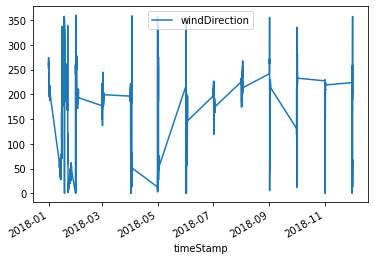

In [132]:
dataset.index = pd.to_datetime(dataset.timeStamp)
dataset = dataset.drop('timeStamp', axis=1)

dataset.plot()

dataset = dataset.sort_index()
dataset.fillna(df.mean(numeric_only=True))

In [133]:
# Testing whether there are null values
dataset[dataset.isnull()]
len(dataset[dataset.isnull()])
dataset = dataset.sort_index()
dataset.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-12-01 22:20:00', '2018-12-01 22:30:00',
               '2018-12-01 22:40:00', '2018-12-01 22:50:00',
               '2018-12-01 23:00:00', '2018-12-01 23:10:00',
               '2018-12-01 23:20:00', '2018-12-01 23:30:00',
               '2018-12-01 23:40:00', '2018-12-01 23:50:00'],
              dtype='datetime64[ns]', name='timeStamp', length=5000, freq=None)

In [134]:
# Replacing NaN values with the previous effective data
dataset.windDirection.fillna(method='pad', inplace=True)
dataset[dataset.windDirection.isnull()]

dataset.describe()

,windDirection
count,5000.000000
mean,159.540493
std,83.064483
min,0.000000
25%,67.976543
50%,192.211800
75%,208.549870
max,359.905914


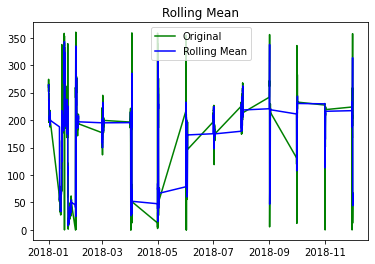

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-4.710674135731934, 8.035205785930118e-05, 20, 4979, {'1%': -3.431664053939323, '5%': -2.862120669208014, '10%': -2.5670790910161703}, 46394.51011938148)
df_output: 
 Test Statistic                   -4.710674
p-value                           0.000080
#Lags Used                       20.000000
Number of Observations Used    4979.000000
dtype: float64
Test Statistic                   -4.710674
p-value                           0.000080
#Lags Used                       20.000000
Number of Observations Used    4979.000000
Critical Value (1%)              -3.431664
Critical Value (5%)              -2.862121
Critical Value (10%)             -2.567079
dtype: float64


In [135]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(ts):    
    # Determing rolling statistics
    #roll_mean = pd.rolling_mean(ts, window=12)
    roll_mean = ts.rolling(12).mean()
    
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)
    
stationarity_check(dataset.windDirection)

In [136]:
#dfIndia['Roll_Mean'] = pd.rolling_mean(dfIndia.AverageTemperature, window=12)
dataset['Roll_Mean'] = dataset.windDirection.rolling(12).mean()
dataset.windDirection.rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


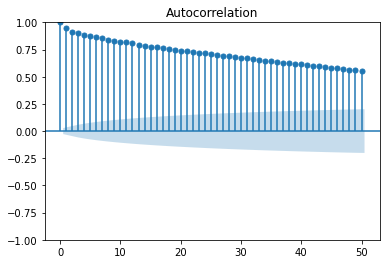

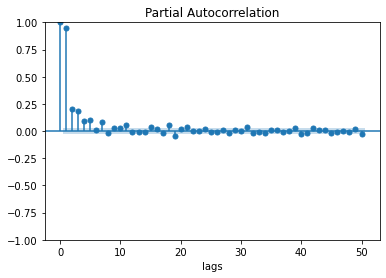

In [137]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(dataset.windDirection, lags=50)
plot_pacf(dataset.windDirection, lags=50)
plt.xlabel('lags')
plt.show()

In [138]:
import statsmodels.api as sm

import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)

for param in pq:
    try:
        mod = sm.tsa.arima.ARIMA(dataset.windDirection, order=(param[0], 0, param[1]))
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue
        
model = sm.tsa.arima.ARIMA(dataset.windDirection, order=(1,0,2))  
results_MA = model.fit()  

C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(0, 0) - AIC:58388.55732841093


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(0, 1) - AIC:53677.05593781416


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(0, 2) - AIC:51578.03745977939


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(0, 3) - AIC:50217.98269702009


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1, 0) - AIC:47225.52276686307


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1, 1) - AIC:46889.08851463311


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1, 2) - AIC:46743.20153665828


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1, 3) - AIC:46741.50269414623


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(2, 0) - AIC:47017.12685981227


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARMA(2, 1) - AIC:46741.99939994699


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(2, 2) - AIC:46738.842092564024


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(2, 3) - AIC:46733.93380688176


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(3, 0) - AIC:46844.53439554405


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(3, 1) - AIC:46739.81951745715


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(3, 2) - AIC:46716.02222343154


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARMA(3, 3) - AIC:46717.10241415408


C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


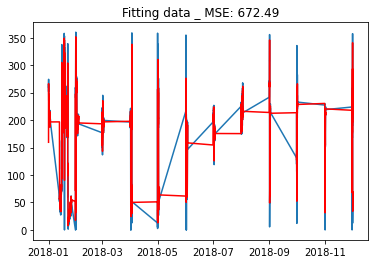

In [139]:
plt.plot(dataset.windDirection)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-dataset.windDirection)**2).mean()))
plt.show()

4887


<AxesSubplot:xlabel='timeStamp'>

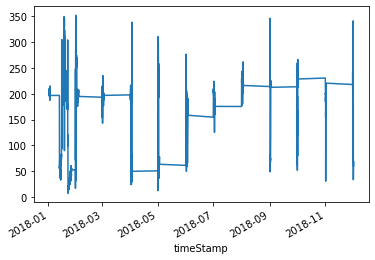

In [146]:
# dataset.index.is_unique
predictions = results_MA.predict('2018-01-01 18:50:00')
predictions
print(len(predictions))
predictions.plot()

In [125]:
import joblib 
joblib.dump(results_MA, 'humidityModel.pkl') 

['humidityModel.pkl']